# DMA COURSE PROJECT
### 5th Sem, CSE 
### Team 07 
|             NAME            	|          USN        	|
|:---------------------------:	|:-------------------:	|
|         Arpit   Arora       	|     01FE19BCS232    	|
|          Yash   Raj         	|     01FE19BCS229    	|
|     Sivanand   Mahapatra    	|     01FE19BCS230    	|
|        Nitish   Kumar       	|     01FE19BCS227    	|
|           Nihad   J         	|     01FE19BCS260    	|


## 5DMACP05 - Cryptocurrency Closing Price Prediction Challenge 




## 1. Problem Statement

> After the boom and bust of cryptocurrencies’ prices in recent years, cryptocurrencies have been increasingly regarded as an investment asset. Because of their highly volatile nature, there is a need for good predictions on which to base investment decisions. Different existing studies have leveraged machine learning for more accurate cryptocurrency price prediction. We are interested in applying different modeling techniques to samples with different data structures (qualitative and quantitative data) and dimensional features to achieve an optimization in price prediction.


## 2. Data

[Dataset from Zindi](https://zindi.africa/competitions/cryptocurrency-closing-price-prediction/data), 

There are 3 datasets:
1. **Train.csv** - contains the target. This is the dataset that you will use to train your model..
2. **Test.csv** - resembles Train.csv but without the target-related columns. This is the dataset on which you will apply your model to..
3. **SampleSubmission.csv** - shows the submission format for this competition, with the ‘id’ column mirroring that of Test.csv and the close column containing your predictions.

## 3. Evaluation

For this problem, our main goal is to reach and exceed a given threshold (a specified RMSE score) in the final developed model.

To see how well our model is doing, we'll calculate the RMSE and then compare our results to others on the [Zindi leaderboard](https://zindi.africa/competitions/cryptocurrency-closing-price-prediction/leaderboard).

## 4. Features

For this dataset, Zindi provided a [data dictionary](https://zindi.africa/competitions/cryptocurrency-closing-price-prediction/data)  which contains information about what each attribute of the dataset means. 

The target value is the closing price. We have data extracted in an interval of 1h for a period of one year (from 1st of March 2020 to 1st of March 2021).

## EDA

### Importing libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from tqdm import tqdm
from tqdm import tqdm_notebook
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from math import sqrt 

from sklearn.metrics import mean_squared_error 
import gc
#import featuretools as ft
%matplotlib inline

### Loading datasets

In [5]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')

### Exploring the data

In [6]:
train.shape, test.shape, ss.shape

((12632, 49), (6222, 48), (6222, 2))

In [7]:
train.describe()

,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
count,12632.0,8617.000000,8617.000000,8617.000000,8.605000e+03,8.379000e+03,8575.000000,8575.000000,12391.000000,12391.000000,...,8107.000000,8107.000000,8107.000000,8107.000000,2950.000000,4786.000000,12632.000000,8313.000000,8.351000e+03,8617.000000
mean,1.0,15504.816128,15559.484568,15449.591187,1.300724e+09,2.826010e+11,1247.310437,757.862857,36.527722,323.989831,...,809.518811,2.128037,1.018749,1.005921,1.349492,3.138947,3920.713268,0.375253,4.616824e+11,15507.395867
std,0.0,14105.710063,14191.106378,14022.651911,1.711922e+09,2.663052e+11,593.108269,303.627395,31.610276,677.419559,...,225.420505,0.432902,0.135646,0.076723,0.868552,5.470365,4824.053810,3.745955,4.597152e+11,14112.405285
min,1.0,4545.087790,4589.712024,4267.292258,2.373622e+08,8.393765e+10,2.000000,2.000000,1.000000,0.000000,...,124.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-44.690403,1.223398e+11,4267.292258
25%,1.0,8405.552062,8437.391908,8378.513061,6.196589e+08,1.506098e+11,857.000000,559.000000,13.000000,79.000000,...,661.000000,2.000000,1.000000,1.000000,1.000000,1.000000,243.000000,-1.252658,2.265741e+11,8402.681367
50%,1.0,9671.831848,9689.751652,9648.410207,9.820621e+08,1.755833e+11,1124.000000,703.000000,28.000000,156.000000,...,819.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3334.000000,0.240354,2.716129e+11,9667.590065
75%,1.0,13077.201438,13089.839678,13047.114786,1.611974e+09,2.191438e+11,1507.500000,893.000000,50.000000,328.000000,...,970.000000,2.000000,1.000000,1.000000,1.000000,3.000000,5178.000000,1.867715,3.788975e+11,13066.731701
max,1.0,61408.929761,61507.371480,61073.192884,5.185678e+10,1.140905e+12,10107.000000,4880.000000,500.000000,30559.000000,...,1490.000000,10.000000,2.000000,2.000000,12.000000,178.000000,140431.000000,34.932303,2.062215e+12,61259.670876


In [8]:
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [9]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062190,11351.690960,11335.062190,1.064152e+09,2.101460e+11,1664.0,1045.0,64.0,...,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631050e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153860e+11,397.0,255.0,11.0,...,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771070e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [10]:
ss.head()

,id,close
0,ID_323Sn2,0.000000
1,ID_325SNW,6397.465467
2,ID_325uzE,12539.847290
3,ID_328qCx,0.000000
4,ID_3293uJ,0.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

In [12]:
train.columns

Index(['id', 'asset_id', 'open', 'high', 'low', 'volume', 'market_cap',
       'url_shares', 'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news',
       'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank', 'medium', 'youtube', 'social_volume',
       'percent_change_24h', 'market_cap_global', 'close'],
      dtype='object')

## Data Preprocessing

### Looking for missing values

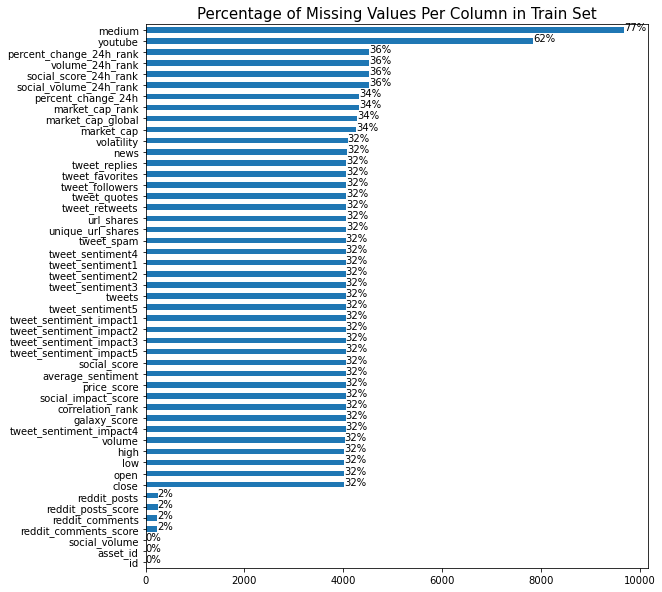

In [13]:
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

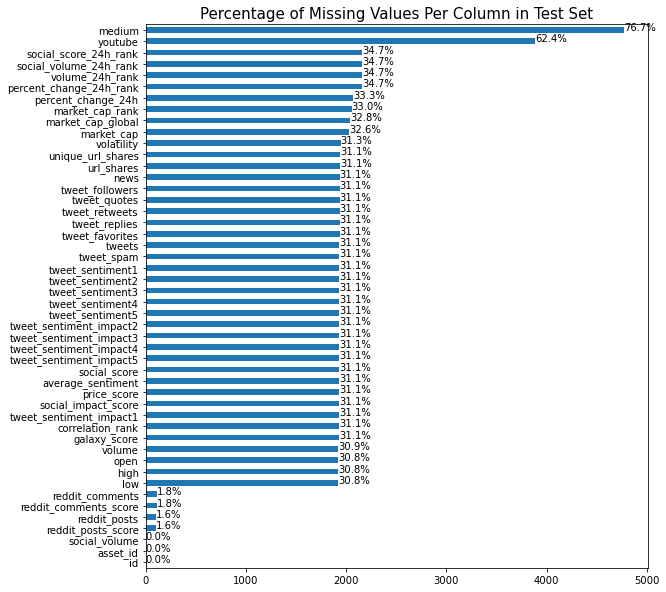

In [14]:
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

### Correlation analysis

In [15]:
train.corr()['close'].sort_values(ascending=False)

close                      1.000000
market_cap                 0.999978
high                       0.999971
low                        0.999956
open                       0.999936
market_cap_global          0.998884
volume_24h_rank            0.787742
tweet_spam                 0.751862
reddit_comments            0.712700
tweet_sentiment2           0.700992
reddit_posts               0.658126
social_volume              0.614383
tweet_followers            0.597276
tweets                     0.596872
social_score               0.574412
tweet_sentiment4           0.568735
tweet_sentiment_impact5    0.565974
url_shares                 0.563648
tweet_sentiment1           0.532631
unique_url_shares          0.526003
tweet_sentiment_impact2    0.509706
tweet_sentiment_impact4    0.485499
tweet_sentiment5           0.466703
tweet_sentiment_impact1    0.450724
tweet_favorites            0.413593
tweet_sentiment3           0.384254
tweet_sentiment_impact3    0.375025
tweet_replies              0

In [16]:
train.isnull().sum()

id                            0
asset_id                      0
open                       4015
high                       4015
low                        4015
volume                     4027
market_cap                 4253
url_shares                 4057
unique_url_shares          4057
reddit_posts                241
reddit_posts_score          241
reddit_comments             230
reddit_comments_score       230
tweets                     4048
tweet_spam                 4048
tweet_followers            4058
tweet_quotes               4058
tweet_retweets             4058
tweet_replies              4058
tweet_favorites            4058
tweet_sentiment1           4048
tweet_sentiment2           4048
tweet_sentiment3           4048
tweet_sentiment4           4048
tweet_sentiment5           4048
tweet_sentiment_impact1    4048
tweet_sentiment_impact2    4048
tweet_sentiment_impact3    4048
tweet_sentiment_impact4    4048
tweet_sentiment_impact5    4048
social_score               4048
average_

#### Dropping rows where entries of most important columns are missing

In [17]:
# train.dropna(axis=0,
#           subset = ['open', 'market_cap', 'market_cap_global', 'volatility', 'percent_change_24h', 'volume'],
#           inplace = True)
# test.dropna(axis=0,
#           subset = ['open', 'market_cap', 'market_cap_global', 'volatility', 'percent_change_24h', 'volume'],
#           inplace = True)
train=train.fillna(0)
test=test.fillna(0)

#### Checking for remaining null values

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     12632 non-null  float64
 3   high                     12632 non-null  float64
 4   low                      12632 non-null  float64
 5   volume                   12632 non-null  float64
 6   market_cap               12632 non-null  float64
 7   url_shares               12632 non-null  float64
 8   unique_url_shares        12632 non-null  float64
 9   reddit_posts             12632 non-null  float64
 10  reddit_posts_score       12632 non-null  float64
 11  reddit_comments          12632 non-null  float64
 12  reddit_comments_score    12632 non-null  float64
 13  tweets                   12632 non-null  float64
 14  tweet_spam            

#### Removing columns with percentage of missing values > 60

In [19]:
train.drop(['medium', 'youtube'], axis=1,inplace=True)
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,0.007118,1.0,606.0,2.0,1.0,1.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,0.009419,1.0,0.0,0.0,0.0,0.0,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,0.013530,1.0,692.0,3.0,1.0,1.0,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,17.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,285,0.000000,0.000000e+00,0.000000
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,0.010332,1.0,749.0,2.0,1.0,1.0,3996,2.609576,3.386925e+11,10384.798216


In [20]:
test.drop(['medium', 'youtube'], axis=1,inplace=True)
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,7.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,9,0.000000,0.000000e+00
1,ID_325SNW,1,11335.062190,11351.690960,11335.062190,1.064152e+09,2.101460e+11,1664.0,1045.0,64.0,...,65.5,0.004407,1.0,711.0,2.0,1.0,1.0,7245,-0.555698,3.631050e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153860e+11,397.0,255.0,11.0,...,65.5,0.024035,1.0,715.0,2.0,1.0,1.0,2702,1.689370,1.771070e+11
3,ID_328qCx,1,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,8.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,225,0.000000,0.000000e+00
4,ID_3293uJ,1,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,26.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,59,0.000000,0.000000e+00


#### Removing columns which are barely useful

In [21]:
# # list of relevant columns to keep

# useful = ['id', 'open', 'high', 'low', 'volume', 'market_cap', 'social_score',
#           'average_sentiment', 'price_score', 'social_impact_score',
#           'correlation_rank', 'volatility', 'market_cap_global',
#           'percent_change_24h', 'close']

# # appending relevant columns to an empty list
# drop = []
# for x in list(train.columns):
#   if x not in useful:
#     drop.append(x)

# train.drop(labels= drop,
#         axis = 1,
#         inplace = True)
# train.head()

In [22]:
# drop = []
# for x in list(test.columns):
#   if x not in useful:
#     drop.append(x)


# # dropping irrelevant columns in test set

# test.drop(labels = drop,
#           axis = 1,
#           inplace = True)

# test.head()

In [23]:
train.shape, test.shape

((12632, 47), (6222, 46))

## Data Visualisation

<AxesSubplot:xlabel='close', ylabel='Count'>

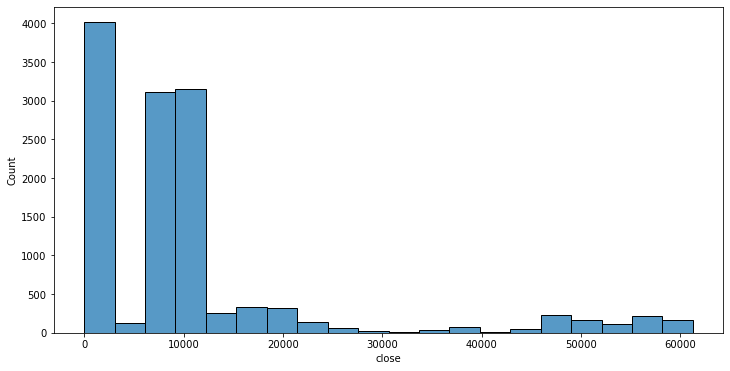

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(data=train,x="close", bins=20)

<AxesSubplot:xlabel='market_cap_global', ylabel='close'>

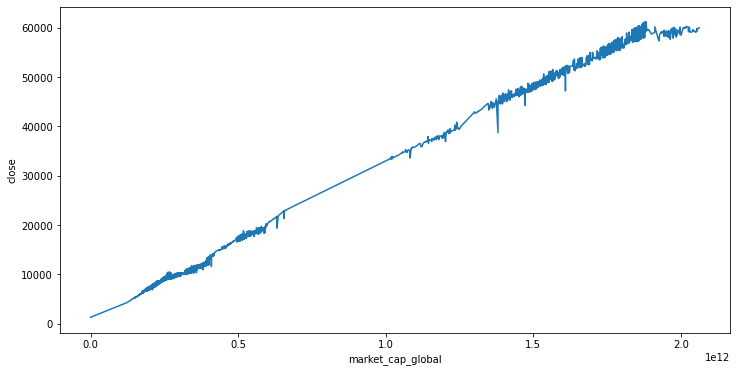

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(x='market_cap_global',y='close',data=train)

<AxesSubplot:xlabel='open', ylabel='close'>

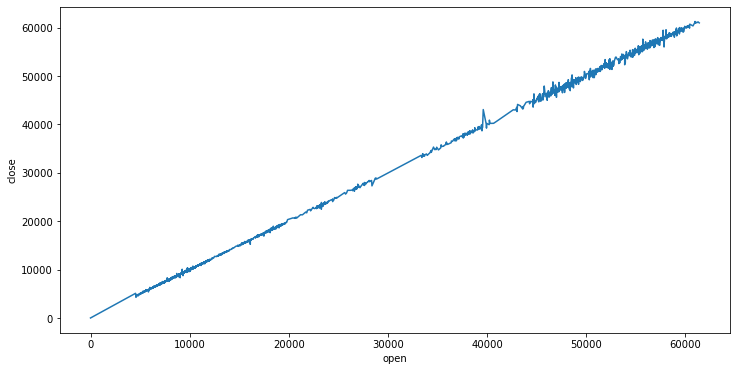

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(x='open',y='close',data=train)

In [25]:
# plt.figure(figsize=(12,6))
# sns.scatterplot(x='tweet_spam',y='close',data=train)

In [26]:
# sns.pairplot(train)

<AxesSubplot:>

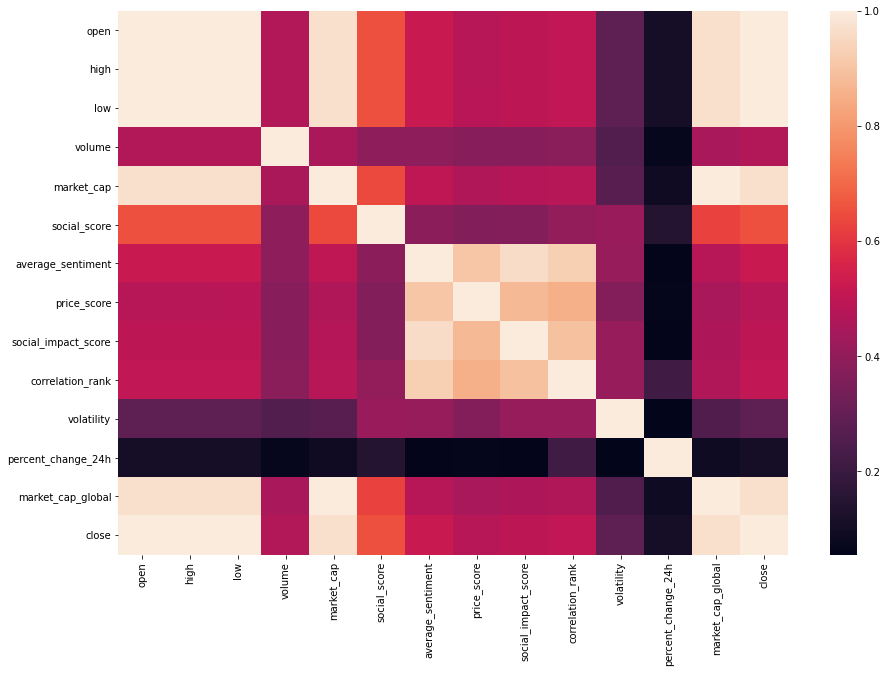

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr())

In [25]:
train.shape

(12632, 47)

## Learning Models

### Linear Regression Model

#### X and y arrays

In [120]:
# Creating the X and y variables

X = train[features]
y = train[['close']]

# features
features = ['open', 'high', 'low', 'market_cap', 'market_cap_global']

In [116]:
from sklearn.preprocessing import StandardScaler 

In [125]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import make_scorer

# custom error function
def rootmse(y_true, y_pred):
    y_true = lab_scaler.inverse_transform(y_true)
    y_pred = lab_scaler.inverse_transform(y_pred)
    return mse(y_true, y_pred, squared=False)
rmse = make_scorer(rootmse, greater_is_better=False)

#### Standardization

In [177]:
# Instantiate standard scaler

scaler = StandardScaler()

# transform data
X = scaler.fit_transform(X)
# y = scaler.fit_transform(y)

#### Train Test Split

In [178]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11368, 5) (1264, 5) (11368, 1) (1264, 1)


#### Creating and Training the Model

In [179]:
lm = LinearRegression()

In [180]:
lm.fit(X_train,y_train)

LinearRegression()

In [181]:
print(lm.intercept_)

[7.42894052e-06]


In [182]:
lm.coef_

array([[-0.53901586,  0.89861433,  0.64077772, -0.00364434,  0.00329764]])

# Predicting values using LinearRegression model

In [183]:
predictions = lm.predict(X_test)
predictions

# pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
# pred

array([[ 0.00780033],
       [ 0.41553467],
       [-0.12931459],
       ...,
       [-0.77122125],
       [-0.77122125],
       [-0.2458143 ]])

Text(0, 0.5, 'Predicted Y')

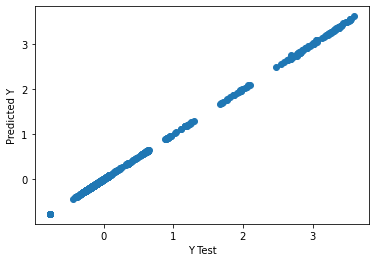

In [169]:
##Scatterplot of real values in train.csv dataset vs predicted values

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

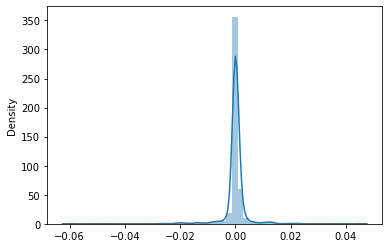

In [170]:
sns.distplot((y_test-predictions));

Evaluating model Performance 

In [184]:
print(rootmse(y_test, predictions))

58.083567859931634


# Using Polynomial Regression


In [98]:
from sklearn.preprocessing import PolynomialFeatures

In [99]:
#Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 2)
X_poly_train= poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)


In [100]:
# Training the model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

LinearRegression()

In [101]:
# Making predictions
# poly_ypred = poly_reg.predict(X_poly_test)

# pred = pd.DataFrame({'Actual': y_test, 'Predicted': poly_ypred})
# pred

Text(0, 0.5, 'Predicted Y')

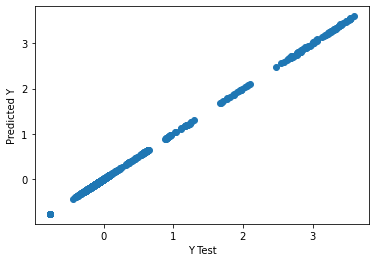

In [102]:
# Scatterplot of predicted values vs Actual values

plt.scatter(y_test,poly_ypred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

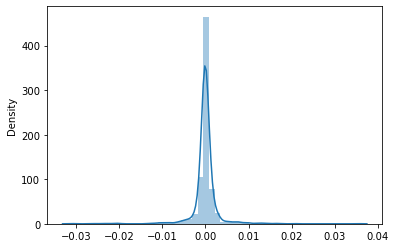

In [103]:
sns.distplot((y_test-poly_ypred));

In [131]:
# Measuring the accuracy of the model

print("The RMSE score for the polynomial model : ", rootmse(y_test, poly_ypred))

The RMSE score for the polynomial model :  42.69637901661923


# Using RandomForest Model

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
# Instantiate model with 1000 decision trees
rf_model  =  RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model

rf_model  =  rf_model.fit(X_train, y_train)

In [108]:
# Making predictions based on the trained model 

rf_ypred = rf_model.predict(X_test)

# pred = pd.DataFrame({'Actual': y_test, 'Predicted': rf_ypred})
# pred

In [109]:
# Scatterplot of predicted values vs Actual values

# plt.scatter(y_test,rf_ypred)
# plt.xlabel('Y Test')
# plt.ylabel('Predicted Y')

In [110]:
# sns.distplot((y_test- rf_ypred));

In [140]:
# Measuring the accuracy of the model

print("The RMSE score for the RandomForest model : ", rootmse(y_test, rf_ypred))

The RMSE score for the RandomForest model :  50.339019245721644


## Elastic Net Regressor

In [112]:
from sklearn.linear_model import ElasticNet

# Training the model
elastic = ElasticNet(normalize=False)
elastic.fit(X_train, y_train)

# Making predictions
elastic_ypred = elastic.predict(X_test)

In [141]:
# Measuring the accuracy of the model
print("RMSE of ElasticNet: ",rootmse(y_test,elastic_ypred))

RMSE of ElasticNet:  7800.797093622639


Text(0, 0.5, 'Predicted Y')

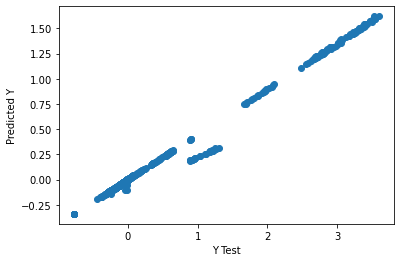

In [142]:
plt.scatter(y_test,elastic_ypred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [134]:
# Making predictions

# pred = pd.DataFrame({'Actual': y_test, 'Predicted': elastic_ypred})
# pred

## Lasso Regression


In [143]:
from sklearn.linear_model import Lasso

# Training the model
lasso = Lasso(normalize=False)
lasso.fit(X_train, y_train)

# Making predictions
lasso_ypred = lasso.predict(X_test)

In [144]:
# Measuring the accuracy of the model
print(f'RMSE of Lasso: {(rootmse(y_test, lasso_ypred))}')

RMSE of Lasso: 13966.129827525183


In [ ]:
plt.scatter(y_test,lasso_ypred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
# Making predictions

pred = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_ypred})
pred

## XGBRegressor

In [148]:
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [149]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [150]:
xgb_ypred = xgb_model.predict(X_test)

In [151]:
# Measuring the accuracy of the model
print(f'RMSE of XGBoost Predictor: {rootmse(y_test, xgb_ypred)}') 


RMSE of XGBoost Predictor: 61.24919945616442


Text(0, 0.5, 'Predicted Y')

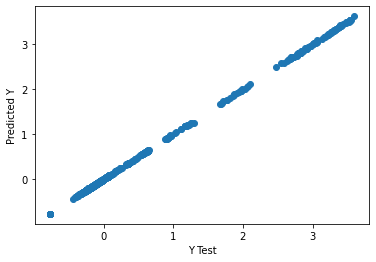

In [152]:
plt.scatter(y_test,xgb_ypred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [159]:
# Making predictions

# pred = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_ypred})

### Submission

In [176]:
test_features = test[features]
test_features = feat_scaler.transform(test_features)

# prediction
close = lm.predict(test_features)
close_descale = lab_scaler.inverse_transform(close)

# sub dataframe
sub = pd.DataFrame({'id': test['id']})
sub['close'] = close_descale
sub.head()

,id,close
0,ID_323Sn2,4.495049
1,ID_325SNW,11343.828479
2,ID_325uzE,6306.091579
3,ID_328qCx,4.495049
4,ID_3293uJ,4.495049
